In [791]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [792]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [793]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [794]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

<Axes: >

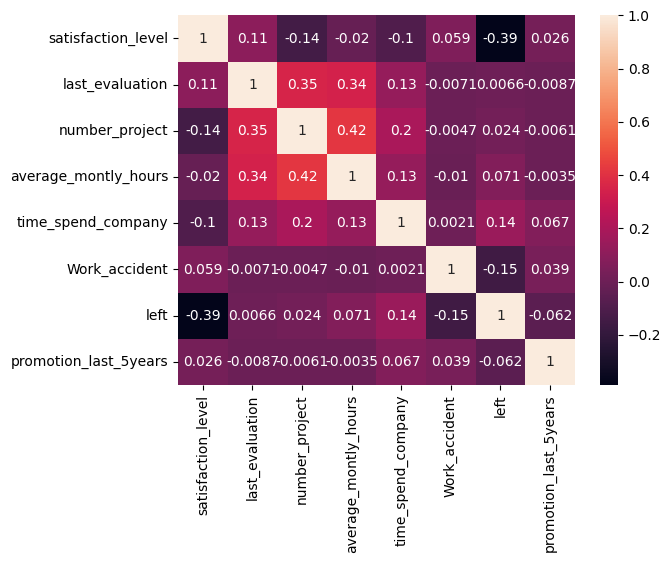

In [795]:
corr_df = df[df.select_dtypes(exclude='object').columns.tolist()].corr()
sns.heatmap(corr_df, annot=True)

In [796]:
# last evaluation is related to number of projects and working hours.
# this makes sense as a higher number of projects and working hours would normally imply
# a higher evaluation.
df.drop(columns=['last_evaluation'], inplace=True)

In [797]:
# for 'left', satisfaction_level, time_spend_company and work_accident seem to have the 
# highest correlation.

<Axes: xlabel='Department'>

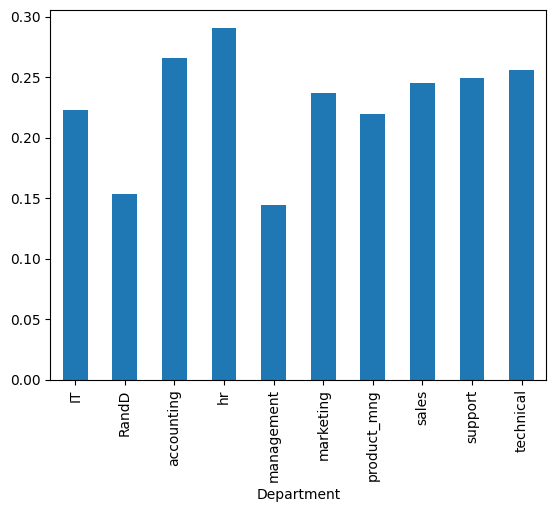

In [798]:
# checking plots of 'left' vs nominal data
df.groupby('Department')['left'].mean().plot.bar()

<Axes: xlabel='salary'>

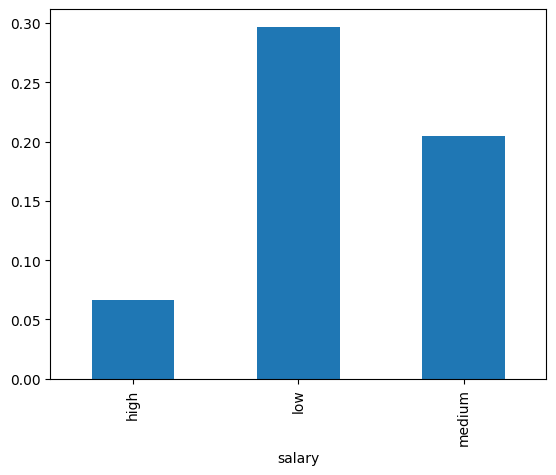

In [799]:
df.groupby('salary')['left'].mean().plot.bar()

In [800]:
# so, the attrition seems to 'reasonably' depend on
# satisfaction_level, time_spend_company, Work_accident for the continuous data
# department for categorical nominal data
# salary for categorical ordinal data

In [801]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oe = OrdinalEncoder(handle_unknown='error')

In [802]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['satisfaction_level', 'time_spend_company', 'Work_accident', 'Department', 'salary']],
    df['left'],
    train_size=0.9
)

In [803]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [804]:
X_train

,satisfaction_level,time_spend_company,Work_accident,Department,salary
0,0.49,2,0,sales,low
1,0.53,2,0,sales,low
2,0.61,4,0,sales,low
3,0.49,2,1,accounting,low
4,0.70,4,0,IT,low
...,...,...,...,...,...
13494,0.09,4,0,sales,low
13495,0.89,3,0,sales,medium
13496,0.97,2,0,management,low
13497,0.60,2,0,IT,low


In [805]:
encoded_dept_train = pd.DataFrame(ohe.fit_transform(X_train['Department'].values.reshape(-1, 1)),
                                 columns=ohe.get_feature_names_out())
encoded_dept_train

,x0_IT,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [806]:
encoded_dept_train.drop(columns='x0_IT', inplace=True)

In [807]:
encoded_salary_train = pd.DataFrame(oe.fit_transform(X_train['salary'].values.reshape(-1, 1)),
                                    columns=['enc_salary'])
encoded_salary_train

,enc_salary
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
13494,1.0
13495,2.0
13496,1.0
13497,1.0


In [808]:
# now complete training set = X_train + encoded_dept + encoded_salary
X_train = pd.concat(
    [encoded_dept_train, encoded_salary_train, X_train], axis=1
)
X_train.drop(columns=['Department', 'salary'], inplace=True)
X_train

,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical,enc_salary,satisfaction_level,time_spend_company,Work_accident
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.49,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.53,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.61,4,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.49,2,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.70,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.09,4,0
13495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.89,3,0
13496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.97,2,0
13497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.60,2,0


In [809]:
# similarly, only doing transform preprocessing for testing data
encoded_dept_test = pd.DataFrame(ohe.transform(X_test['Department'].values.reshape(-1, 1)),
                                 columns=ohe.get_feature_names_out())
encoded_dept_test.drop(columns='x0_IT', inplace=True)
encoded_salary_test = pd.DataFrame(oe.transform(X_test['salary'].values.reshape(-1, 1)),
                                   columns=['enc_salary'])
X_test = pd.concat(
    [encoded_dept_test, encoded_salary_test, X_test], axis=1
)
X_test.drop(columns=['Department', 'salary'], inplace=True)
X_test

,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical,enc_salary,satisfaction_level,time_spend_company,Work_accident
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.85,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.51,3,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.82,3,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.57,7,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.86,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.55,2,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.45,3,0
1497,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.70,2,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.60,4,0


In [810]:
# creating logistic regression model based on our determined features and target
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [811]:
# Comparing with testing data for score
model.score(X_test, y_test)

0.7833333333333333